# アヤメの分類

# 分類問題の流れ

## 【問題1】練習のために特徴量とカテゴリを選択

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


iris = load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 
                                                                 'petal_width'])

y = pd.DataFrame(iris.target, columns =['Species'])

df = pd.concat([X, y], axis=1)

Species12 = df[df["Species"] != 0] #virgicolorとvirginica
 
df_sl_pl = df[["sepal_length", "petal_length"]]

Species12_sl_pl  = Species12[["sepal_length", "petal_length"]]


## 【問題2】データの分析

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


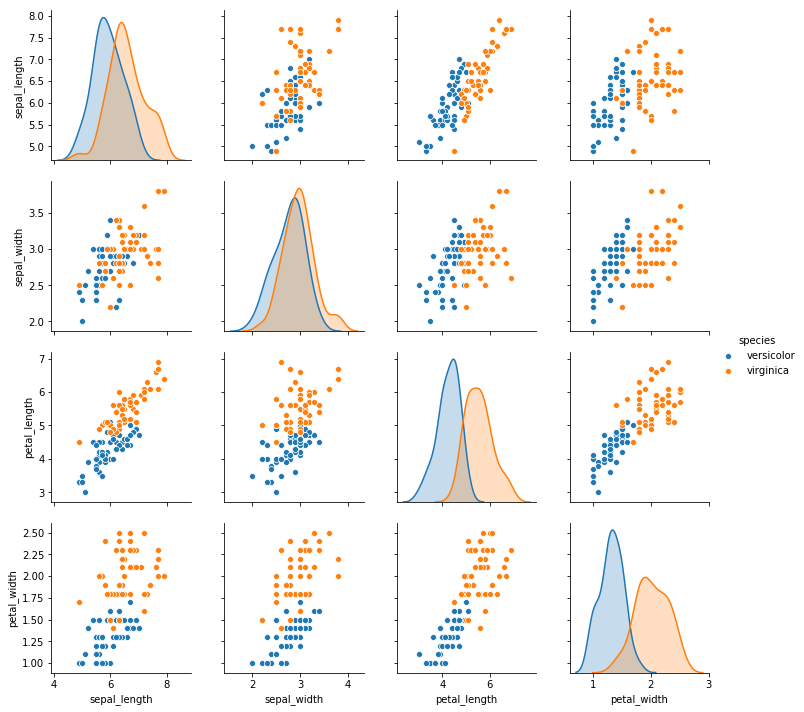

In [2]:
# 散布図
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', hue_order=['versicolor', 'virginica'])

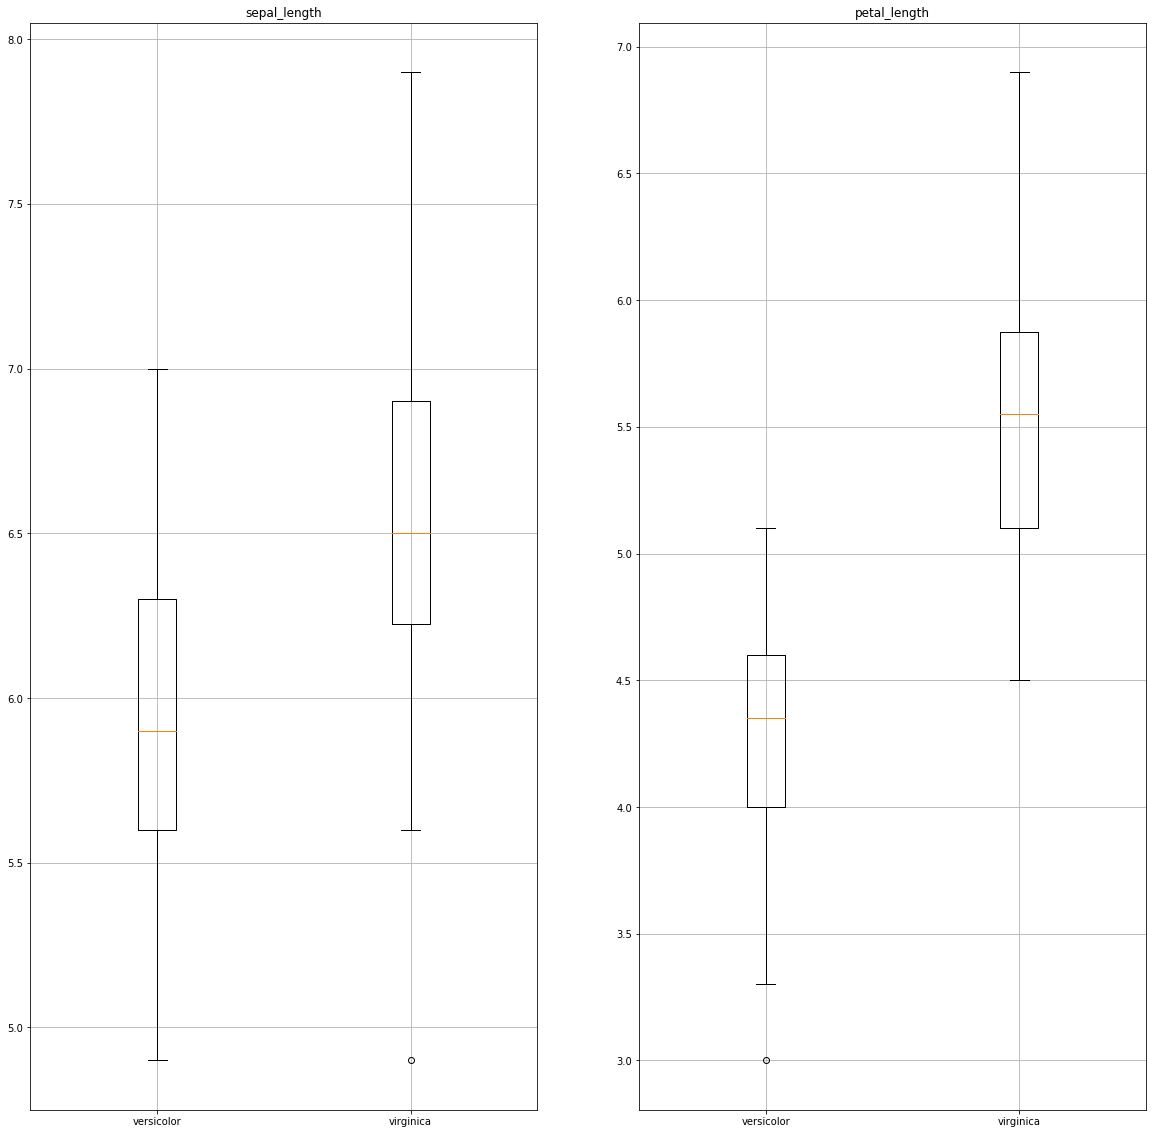

In [3]:
# 箱ひげ図

Species1 = df[df["Species"] == 1]#"versicolor"
Species2 = df[df["Species"] == 2]#"virginica"

def plot_hakohige(param):
    ax.set_title(param)
    ax.grid(True)
    ax.boxplot([Species1[param], Species2[param]])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(["versicolor", "virginica" ])
    
    return

sl = 'sepal_length'
pl = 'petal_length'


fig = plt.figure(figsize=(20,20),facecolor="w")

ax = fig.add_subplot(1, 2, 1)
plot_hakohige(sl)

ax = fig.add_subplot(1, 2, 2)
plot_hakohige(pl)



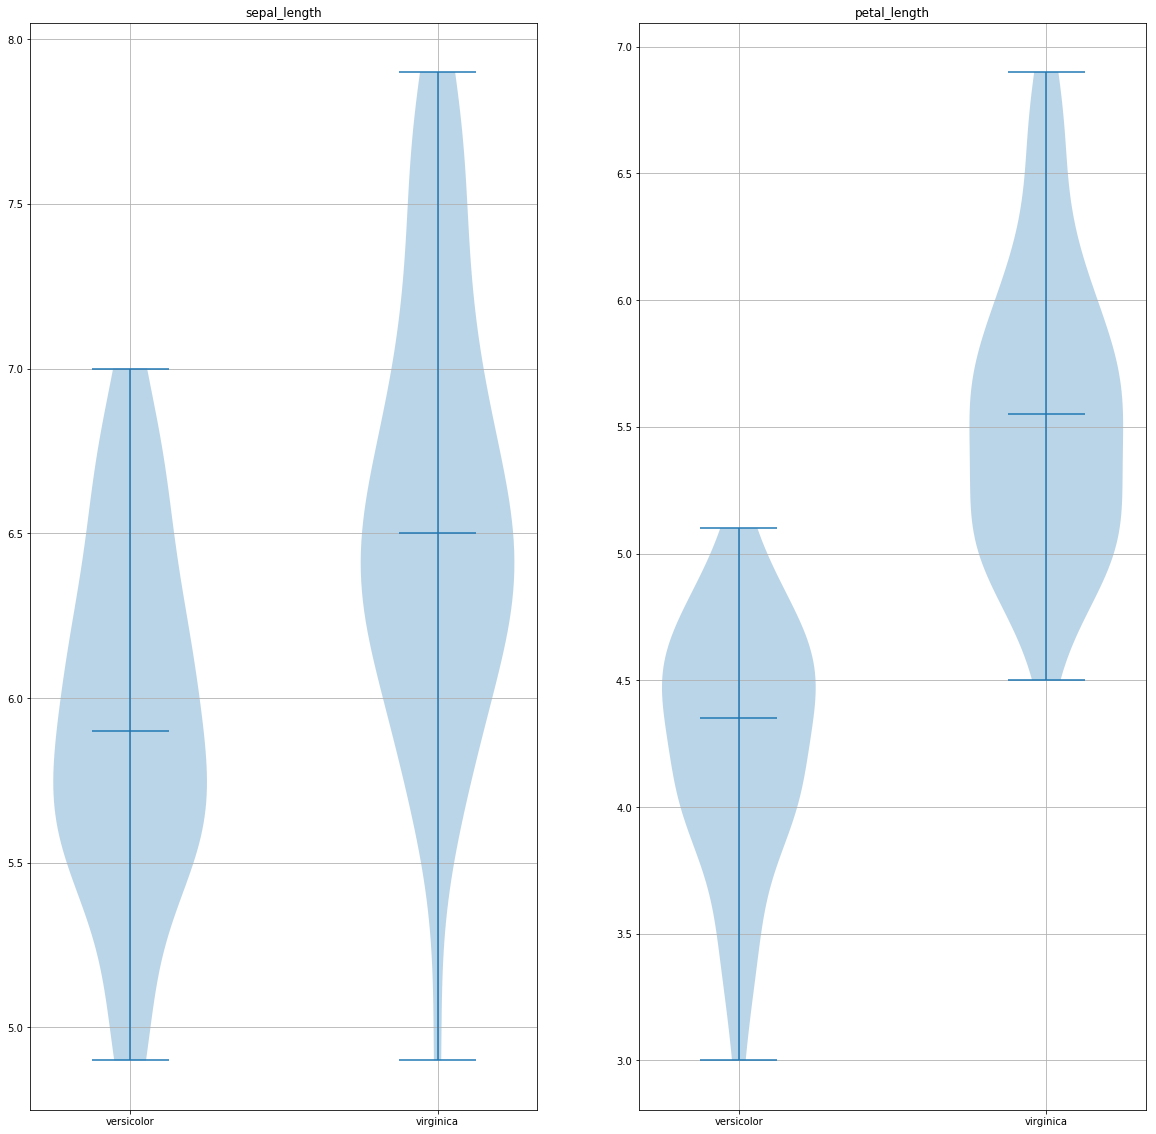

In [4]:
# バイオリン図

Species1 = df[df["Species"] == 1]#"versicolor"
Species2 = df[df["Species"] == 2]#"virginica"

def plot_violin(param):
    ax.set_title(param)
    ax.grid(True)
    ax.violinplot([Species1[param], Species2[param]],showmedians=True)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(["versicolor", "virginica" ])
    
    return

sl = 'sepal_length'
pl = 'petal_length'

fig = plt.figure(figsize=(20,20),facecolor="w")

ax = fig.add_subplot(1, 2, 1)
plot_violin(sl)

ax = fig.add_subplot(1, 2, 2)
plot_violin(pl)


## 【問題3】前処理・訓練用データと検証用データの分割

In [5]:
from sklearn.model_selection import train_test_split

X, y  = np.array(Species12_sl_pl), np.array(Species12["Species"])

Species12_sl_pl

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
55,5.7,4.5
56,6.3,4.7
57,4.9,3.3
58,6.6,4.6
59,5.2,3.9


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25)

## 【問題4】前処理・標準化

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_fit = scalar.fit(X_train)
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.fit_transform(X_test)

## 【問題5】学習と推定

In [8]:
from sklearn.neighbors import KNeighborsClassifier

neigh_5 =  KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_std, y_train)
prediction_5= neigh_5.predict(X_test_std)
prediction_5

array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2])

In [9]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_std, y_train)
prediction_3= neigh_3.predict(X_test_std)
prediction_3

array([1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2])

In [10]:
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train_std, y_train)
prediction_1= neigh_1.predict(X_test_std)
prediction_1

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2])

## 【問題6】評価

### scikit-learnを使い4種類の指標を計算する

In [11]:
#正解率 (Accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_5)

0.96

In [12]:
#精度 (Precision)
from sklearn.metrics import precision_score
precision_score(y_test, prediction_5)

0.9230769230769231

In [13]:
#検出率 (Recall)
from sklearn.metrics import recall_score
recall_score(y_test, prediction_5)

1.0

In [14]:
# F 値
from sklearn.metrics import f1_score
f1_score(y_test, prediction_5)

0.9600000000000001

### 混同行列をscikit-learnを使い表示する

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction_5)

array([[12,  0],
       [ 1, 12]])

### 4種類の指標値の意味について簡単に調査して文章でまとめる

- 正解率 (Accuracy)
正解率 (Accuracy) とは、「本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合」を示し、以下の式で表されます。

Accuracy = (TP + TN) / (TP + TN + FP + FN)

- 精度 (Precision)
精度 (Precision) とは、「ポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合」を示し、以下の式で表されます。

Precision = TP / (TP + FP)

- 検出率 (Recall)
検出率 (Recall) とは、「本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合」を示し、以下の式で表されます。
検出率は、真陽性率 (TPR, True-Positive Rate) または、感度 (Sensitivity) とも呼ばれます。

Recall = TPR = Sensitivity = TP / (TP + FN)

- F 値
F 値 (F-measure, F-score, F1 Score とも呼ばれます) とは、精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標です。つまり、精度は高くても、検出率が低いモデルでないか、逆に、検出率は高くても、精度が低くなっていないか、といった評価を示します。

F 値は、以下の式のように、検出精度 (Precision) と、検出率 (Recall) の調和平均で求められ、0 〜 1 の間の数値で出力され、0 の場合最も悪い評価、1 の場合最も良い評価となります。

F1 = 2 * (precision * recall) / (precision + recall)


## 【問題7】可視化

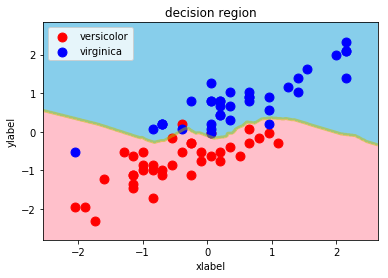

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



    
decision_region(X_train_std, y_train,neigh_5)

# 各手法の比較

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## 【問題8】他の手法の学習

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

In [46]:
def sklearn_model(model_list,X_train=X_train_std, X_test=X_test_std, y_train=y_train, y_test=y_test):    
    df_indi = pd.DataFrame(np.zeros((len(model_list),4)), index=[model_list],columns=["accuracy","precision","recall","f1_score"])
    for model2 in model_list:
        if model2 == KNeighborsClassifier:
            model = KNeighborsClassifier(n_neighbors=5)
        else:
            model= eval(model2)()
        model.fit(X_train_std,y_train)
        y_pred = model.predict(X_test_std)
        df_indi.at[model2,"accuracy"] = accuracy_score(y_test, y_pred)
        df_indi.at[model2,"precision"] = precision_score(y_test, y_pred)
        df_indi.at[model2,"recall"] = recall_score(y_test, y_pred)
        df_indi.at[model2,"f1_score"] = f1_score(y_test, y_pred)
        print(model2)
        decision_region(X_train_std,y_train,model)
    return(df_indi)

KNeighborsClassifier


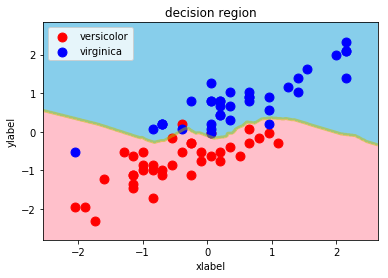

LogisticRegression


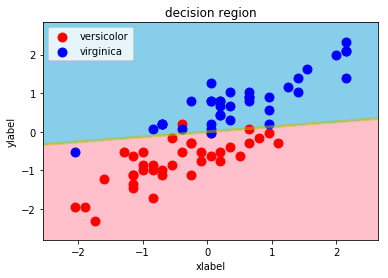

SVC


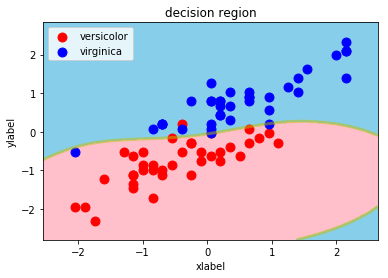

DecisionTreeClassifier


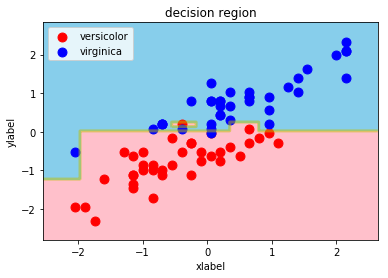

RandomForestClassifier


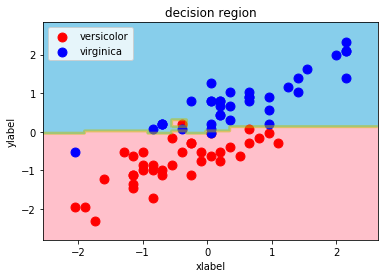

,accuracy,precision,recall,f1_score
KNeighborsClassifier,0.96,0.923077,1.0,0.960000
LogisticRegression,0.96,0.923077,1.0,0.960000
SVC,1.00,1.000000,1.0,1.000000
DecisionTreeClassifier,0.92,0.857143,1.0,0.923077
RandomForestClassifier,0.96,0.923077,1.0,0.960000


In [48]:
model_list = ["KNeighborsClassifier","LogisticRegression", "SVC","DecisionTreeClassifier","RandomForestClassifier"]

sklearn_model(model_list)

- 指標を見ると、SVMが全ての指標で満点である。
- ただ、SVMはグラフにおいて、明らかに赤い点が一つ青い点に分類されている。
- ランダムフォレストは青に混じっている赤い点をピンポイントで分類しており、無理があると感じる。